# Linear Sequential Estimation

In [52]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1)

In [53]:
# Import functions directly from github
# Important: note that we use raw.githubusercontent.com, not github.com

import requests
url = 'https://raw.githubusercontent.com/florisvb/Nonlinear_and_Data_Driven_Estimation/main/Utility/plot_utility.py'
r = requests.get(url)

# Store the file to the colab working directory
with open('plot_utility.py', 'w') as f:
    f.write(r.text)

# import the function we want from that file
from plot_utility import plot_tme

# Generate sample time series data

In [54]:
t = np.linspace(0, 6, 500)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

# Add some normal (gaussian) noise

In [55]:
# Example for Gaussian (normal) random variable

noise_mean = 0
noise_std = 0.5

v = np.column_stack(np.random.normal(noise_mean, noise_std, len(y))).T

In [56]:
y_tilde = y+v

# Plotting

<Axes: xlabel='Time', ylabel='y'>

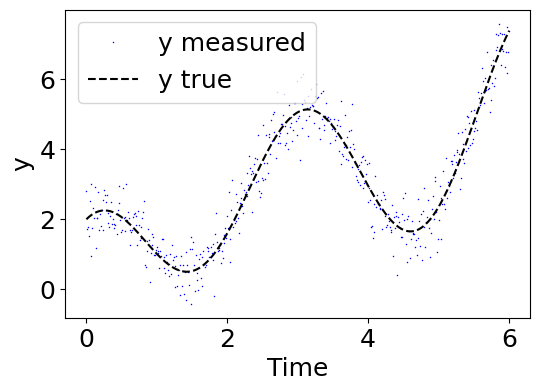

In [57]:
plot_tme(t, y, y_tilde)

# Candidate models

In [58]:
model_1_H = np.vstack([t, np.sin(t), np.cos(2*t)]).T

# Exercise

Implement Linear Sequential Estimation, and plot the three parameters of $x$ over time

In [59]:
inv = np.linalg.inv

In [60]:
x0 = np.array([[0, 0, 0]]).T
x_list = [x0]

inv_P = inv(10*np.eye(3))

for i, y_kp1 in enumerate(y_tilde):
  x_k = x_list[-1]
  H_kp1 = model_1_H[i:i+1,:]
  W = np.eye(1) #np.array([[1]])

  inv_P = inv_P + H_kp1.T@W@H_kp1
  P = inv(inv_P)
  K = P@H_kp1.T@W
  x_kp1 = x_k + K@(y_kp1 - H_kp1@x_k)

  x_list.append( x_kp1 )

Text(0, 0.5, 'State val')

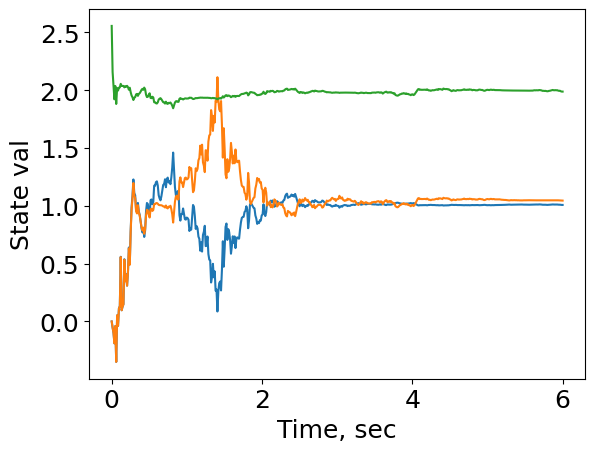

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t, X[0,1:])
ax.plot(t, X[1,1:])
ax.plot(t, X[2,1:])

ax.set_xlabel('Time, sec')
ax.set_ylabel('State val')